In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = "Resources/lending_data.csv"

# Review the DataFrame
df = pd.read_csv(path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"].ravel()


# Separate the X variable, the features
X = df.copy()
X.drop("loan_status", axis=1, inplace=True)


In [6]:
# Review the y variable Series
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [7]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [44]:
# Check the balance of our target values

pd.Series(y).value_counts()

0    75036
1     2500
dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [12]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
predictions = classifier.predict(X_test)


Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model
print(f' Balanced Accuracy Score: {balanced_accuracy_score(y_test, predictions)}')

 Balanced Accuracy Score: 0.9520479254722232


In [22]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

cm_df.head()


,Predicted 0,Predicted 1
Actual 0,18663,102
Actual 1,56,563


In [23]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model predicts giving a healthy loan 100% accurate. It predicts high risk loans 85% accurately. Recall is similar where it predicts 99% of healthy loans and 91% of high risk loans. For high risk loans the number of data is a bit low which may skew the data

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [26]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)


# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)


In [28]:
# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_resampled).value_counts()
label_counts

0    56271
1    56271
dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
rf_model = RandomForestClassifier(n_estimators=500, random_state=1) 

# Fit the model using the resampled training data
rf_model = rf_model.fit(X_resampled, y_resampled)
# Make a prediction using the testing data
y_pred = rf_model.predict(X_resampled)



### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [38]:
# Print the balanced_accuracy score of the model 
print(f' Balanced Accuracy Score: {balanced_accuracy_score(y_resampled, y_pred)}')

 Balanced Accuracy Score: 0.9969167066517389


In [39]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_resampled, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

cm_df.head()

,Predicted 0,Predicted 1
Actual 0,56104,167
Actual 1,180,56091


In [40]:
# Print the classification report for the model
print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       1.00      1.00      1.00     56271

    accuracy                           1.00    112542
   macro avg       1.00      1.00      1.00    112542
weighted avg       1.00      1.00      1.00    112542



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This model does much better than the previous one with 99 percent predictions for healthy loans and high risk loans in both categories 0 and 1. This model does much better in predicting accurate loan status.

In [41]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


[(0.22421915058783598, 'borrower_income'),
 (0.2221127063910734, 'interest_rate'),
 (0.19851336383658638, 'debt_to_income'),
 (0.1925569884908157, 'total_debt'),
 (0.08944873090541097, 'loan_size'),
 (0.07314816986770932, 'num_of_accounts'),
 (8.899205684479506e-07, 'derogatory_marks')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

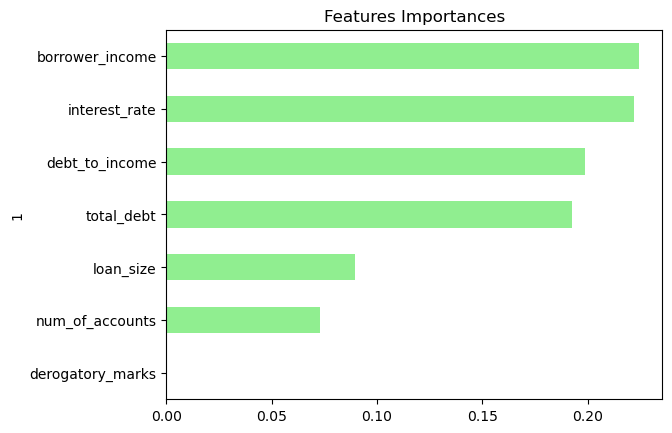

In [42]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)